In [1]:
pd

NameError: name 'pd' is not defined

In [2]:
import pandas as pd


In [3]:
import pandas as pd
from urllib.request import urlretrieve
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup


In [4]:
url = 'https://www.worldometers.info/coronavirus/country/us/#nav-yesterday'


In [5]:
request = Request(url)


In [6]:
request = requests.get(url)



<!DOCTYPE html>
<!--[if IE 8]> <html lang="en" class="ie8"> <![endif]-->
<!--[if IE 9]> <html lang="en" class="ie9"> <![endif]-->
<!--[if !IE]><!--> <html lang="en"> <!--<![endif]-->
<head>
<meta charset="utf-8">
<meta http-equiv="X-UA-Compatible" content="IE=edge">
<meta name="viewport" content="width=device-width, initial-scale=1">
<title>United States COVID - Coronavirus Statistics - Worldometer</title>
<meta name="description" content="United States Coronavirus update with statistics and graphs: total and new cases, deaths per day, mortality and recovery rates, current active cases, recoveries, trends and timeline.">

<link rel="shortcut icon" href="/favicon/favicon.ico" type="image/x-icon">
<link rel="apple-touch-icon" sizes="57x57" href="/favicon/apple-icon-57x57.png">
<link rel="apple-touch-icon" sizes="60x60" href="/favicon/apple-icon-60x60.png">
<link rel="apple-touch-icon" sizes="72x72" href="/favicon/apple-icon-72x72.png">
<link rel="apple-touch-icon" sizes="76x76" href="/f
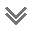

In [7]:
print(request.text)


In [8]:
#empty list
data = []


In [9]:
# for getting the header from
# the HTML file
list_header = []
soup = BeautifulSoup(request.text,'html.parser')
header = soup.find_all("table")[0].find("tr")


In [10]:
for items in header:
    try:
        list_header.append(items.get_text())
    except:
        continue


In [11]:
# for getting the data 
HTML_data = soup.find_all("table")[0].find_all("tr")[1:]
  
for element in HTML_data:
    sub_data = []
    for sub_element in element:
        try:
            sub_data.append(sub_element.get_text())
        except:
            continue
    data.append(sub_data)


In [12]:
# Storing the data into Pandas
# DataFrame 
df = pd.DataFrame(data = data, columns = list_header)


In [13]:
# Drop Country total row
df2= df.drop([0, 64])


In [14]:
# Drop columns unwanted columns
df3=df2.drop(columns=['\n', '#', 'Source', 'Projections'])


In [15]:
#Remove HTML leftover code
df4 = df3.replace('\n','', regex=True)
df5 = df4.rename(columns={'Tests/\n1M pop\n': 'Tests/1M pop'})


In [16]:
#Describe the dataframe by printing the first few rows
print(df5.head())


      USAState  TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
1  California   7,450,319               78,870                      N/A    
2       Texas   5,972,238               78,491                      N/A    
3     Florida   5,351,391               63,576                3,666,925    
4    New York   4,832,399               63,824                2,601,723    
5    Illinois   2,773,362               33,446                1,924,335    

  ActiveCases Tot Cases/1M pop Deaths/1M pop    TotalTests Tests/1M pop  \
1        N/A           188,557         1,996  131,160,392     3,319,489   
2        N/A           205,968         2,707   55,862,537     1,926,568   
3  1,620,890           249,160         2,960   50,466,759     2,349,724   
4  2,166,852           248,407         3,281   95,500,969     4,909,177   
5    815,581           218,861         2,639   49,488,107     3,905,367   

    Population  
1  39,512,223   
2  28,995,881   
3  21,477,737   
4  19,453,561   
5  12,6

In [17]:
#Dataframe Summary Statistics
print(df5.describe())


           USAState  TotalCases NewCases TotalDeaths NewDeaths TotalRecovered  \
count            63          63       63          63        63             63   
unique           63          63        1          61         1             46   
top     California   7,450,319                                           N/A    
freq              1           1       63           3        63             18   

       ActiveCases Tot Cases/1M pop Deaths/1M pop TotalTests Tests/1M pop  \
count           63               63            63         63           63   
unique          44               53            53         61           53   
top           N/A                                                           
freq            17               11            11          3           11   

       Population  
count          63  
unique         53  
top                
freq           11  


In [18]:
#Top 5 States New Cases
df6 = df5.sort_values(by=['NewCases'], ascending=False)
print(df6[['USAState', 'NewCases']].head(5))


          USAState NewCases
1      California          
48          Maine          
35         Oregon          
36     New Mexico          
37  West Virginia          


In [19]:
#Top 5 States New Cases
df6 = df5.sort_values(by=['NewCases'], ascending=False)
print(df6[['USAState', 'NewCases']].head(5))
#Top 5 States Total Deaths / 1M pop
df9 = df5.sort_values(by=['Deaths/1M pop'], ascending=False)
print(df9[['USAState', 'Deaths/1M pop']].head(5))


          USAState NewCases
1      California          
48          Maine          
35         Oregon          
36     New Mexico          
37  West Virginia          
        USAState Deaths/1M pop
51      Vermont            824
46       Hawaii            809
32  Mississippi          3,602
12      Arizona          3,520
11   New Jersey          3,463
